In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
visited = pd.read_csv("./res/survey_visited.csv")
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [3]:
survey = pd.read_csv("./res/survey_survey.csv")
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [5]:
vs = visited.merge(survey, left_on="ident", right_on="taken") # ident == taken
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [9]:
from numpy import NaN, NAN, nan
num_legs = pd.Series({"goat":4, "amoeba":nan})
num_legs

goat      4.0
amoeba    NaN
dtype: float64

In [12]:
gapminder = pd.read_csv("./res/gapminder.tsv", sep="\t")
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [14]:
life_exp = gapminder.groupby(["year"])["lifeExp"].mean()
life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [15]:
life_exp.loc[range(2000, 2010),]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


year
2000          NaN
2001          NaN
2002    65.694923
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007    67.007423
2008          NaN
2009          NaN
Name: lifeExp, dtype: float64

In [17]:
life_exp[life_exp.index > 2000]

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [18]:
ebola = pd.read_csv("./res/country_timeseries.csv")
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


In [19]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [20]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [22]:
ebola.count() # NaN을 제외한 데이터 행의 개수 

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [25]:
num_missing = ebola.shape[0] - ebola.count()
num_missing

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [26]:
ebola.isnull()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
1,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
3,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
5,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
6,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
7,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,True,True
8,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
9,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True


In [27]:
ebola["Cases_Guinea"].isnull()

0      False
1      False
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12      True
13     False
14      True
15     False
16      True
17     False
18      True
19     False
20     False
21      True
22     False
23      True
24     False
25      True
26      True
27     False
28     False
29      True
       ...  
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100     True
101    False
102     True
103     True
104    False
105    False
106    False
107     True
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
Name: Cases_Guinea, Length: 122, dtype: bool

In [34]:
np.count_nonzero(ebola["Cases_Guinea"].isnull())

29

In [36]:
ebola.Cases_Guinea.value_counts(dropna=False)

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
506.0      1
812.0      1
771.0      1
648.0      1
607.0      1
579.0      1
543.0      1
519.0      1
510.0      1
2597.0     1
2769.0     1
899.0      1
2571.0     1
485.0      1
472.0      1
460.0      1
427.0      1
415.0      1
861.0      1
942.0      1
936.0      1
1667.0     1
2706.0     1
2416.0     1
2292.0     1
          ..
1519.0     1
151.0      1
1199.0     1
143.0      1
127.0      1
122.0      1
103.0      1
49.0       1
2695.0     1
2730.0     1
208.0      1
218.0      1
408.0      1
412.0      1
413.0      1
398.0      1
351.0      1
344.0      1
328.0      1
291.0      1
281.0      1
258.0      1
248.0      1
233.0      1
236.0      1
235.0      1
231.0      1
226.0      1
224.0      1
2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64

In [37]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


In [39]:
ebola.fillna(0).iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [40]:
ebola.fillna(method="ffill") # or method="bfill"

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,8018.0,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,3423.0,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,1697.0,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,7977.0,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,3413.0,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


In [41]:
ebola.shape

(122, 18)

In [42]:
ebola_dropna = ebola.dropna() # Na가 존재하는 행 제거
ebola_dropna

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [43]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [46]:
ebola["Cases_multiple"] = ebola["Cases_Guinea"] + ebola["Cases_Liberia"] +ebola["Cases_SierraLeone"]
ebola_subset = ebola[["Cases_multiple", "Cases_Liberia", "Cases_SierraLeone", "Cases_multiple"]]
ebola_subset

,Cases_multiple,Cases_Liberia,Cases_SierraLeone,Cases_multiple
0,NaN,NaN,10030.0,NaN
1,NaN,NaN,9780.0,NaN
2,20657.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,20478.0,8115.0,9633.0,20478.0
5,20170.0,8018.0,9446.0,20170.0
6,NaN,NaN,9409.0,NaN
7,19810.0,7977.0,9203.0,19810.0
8,NaN,NaN,9004.0,NaN
9,19372.0,7862.0,8939.0,19372.0


In [49]:
print(ebola.Cases_Guinea.sum(skipna=False))
print(ebola.Cases_Guinea.sum(skipna=True))

nan
84729.0


In [50]:
# 소득과 종교간의 관계 데이터
pew = pd.read_csv("./res/pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [51]:
pew.iloc[:, :6]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k
0,Agnostic,27,34,60,81,76
1,Atheist,12,27,37,52,35
2,Buddhist,27,21,30,34,33
3,Catholic,418,617,732,670,638
4,Don’t know/refused,15,14,15,11,10
5,Evangelical Prot,575,869,1064,982,881
6,Hindu,1,9,7,9,11
7,Historically Black Prot,228,244,236,238,197
8,Jehovah's Witness,20,27,24,24,21
9,Jewish,19,19,25,25,30


In [52]:
pd.melt(pew)

,variable,value
0,religion,Agnostic
1,religion,Atheist
2,religion,Buddhist
3,religion,Catholic
4,religion,Don’t know/refused
5,religion,Evangelical Prot
6,religion,Hindu
7,religion,Historically Black Prot
8,religion,Jehovah's Witness
9,religion,Jewish


In [54]:
# religion col을 기준으로 피봇한 상태
pd.melt(pew, id_vars="religion") # id_vars col을 제외하고 melt

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [61]:
pew_long = pd.melt(pew, id_vars="religion", 
                   var_name="incom", value_name="count")
pew_long

,religion,incom,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [63]:
billboard = pd.read_csv("./res/billboard.csv")
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
year            317 non-null int64
artist          317 non-null object
track           317 non-null object
time            317 non-null object
date.entered    317 non-null object
wk1             317 non-null int64
wk2             312 non-null float64
wk3             307 non-null float64
wk4             300 non-null float64
wk5             292 non-null float64
wk6             280 non-null float64
wk7             269 non-null float64
wk8             260 non-null float64
wk9             253 non-null float64
wk10            244 non-null float64
wk11            236 non-null float64
wk12            222 non-null float64
wk13            210 non-null float64
wk14            204 non-null float64
wk15            197 non-null float64
wk16            182 non-null float64
wk17            177 non-null float64
wk18            166 non-null float64
wk19            156 non-null float64
wk20           

In [65]:
pd.melt(billboard)

,variable,value
0,year,2000
1,year,2000
2,year,2000
3,year,2000
4,year,2000
5,year,2000
6,year,2000
7,year,2000
8,year,2000
9,year,2000


In [68]:
pd.melt(billboard, id_vars=["year", "artist", "track", "time", "date.entered"], var_name="week", value_name="rating")

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


In [69]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali', 'Cases_multiple'],
      dtype='object')

In [70]:
ebola.iloc[:5, [0, 1, 2, 3, 10, 11]]

,Date,Day,Cases_Guinea,Cases_Liberia,Deaths_Guinea,Deaths_Liberia
0,1/5/2015,289,2776.0,NaN,1786.0,NaN
1,1/4/2015,288,2775.0,NaN,1781.0,NaN
2,1/3/2015,287,2769.0,8166.0,1767.0,3496.0
3,1/2/2015,286,NaN,8157.0,NaN,3496.0
4,12/31/2014,284,2730.0,8115.0,1739.0,3471.0


In [74]:
ebola_long = pd.melt(ebola, id_vars=["Date", "Day"])
ebola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
5,12/28/2014,281,Cases_Guinea,2706.0
6,12/27/2014,280,Cases_Guinea,2695.0
7,12/24/2014,277,Cases_Guinea,2630.0
8,12/21/2014,273,Cases_Guinea,2597.0
9,12/20/2014,272,Cases_Guinea,2571.0


In [77]:
variable_split = ebola_long.variable.str.split("_")
print(type(variable_split))
variable_split

<class 'pandas.core.series.Series'>


0         [Cases, Guinea]
1         [Cases, Guinea]
2         [Cases, Guinea]
3         [Cases, Guinea]
4         [Cases, Guinea]
5         [Cases, Guinea]
6         [Cases, Guinea]
7         [Cases, Guinea]
8         [Cases, Guinea]
9         [Cases, Guinea]
10        [Cases, Guinea]
11        [Cases, Guinea]
12        [Cases, Guinea]
13        [Cases, Guinea]
14        [Cases, Guinea]
15        [Cases, Guinea]
16        [Cases, Guinea]
17        [Cases, Guinea]
18        [Cases, Guinea]
19        [Cases, Guinea]
20        [Cases, Guinea]
21        [Cases, Guinea]
22        [Cases, Guinea]
23        [Cases, Guinea]
24        [Cases, Guinea]
25        [Cases, Guinea]
26        [Cases, Guinea]
27        [Cases, Guinea]
28        [Cases, Guinea]
29        [Cases, Guinea]
              ...        
2044    [Cases, multiple]
2045    [Cases, multiple]
2046    [Cases, multiple]
2047    [Cases, multiple]
2048    [Cases, multiple]
2049    [Cases, multiple]
2050    [Cases, multiple]
2051    [Cas

In [83]:
status_value = variable_split.str.get(0)
country_value = variable_split.str.get(1)
print(status_value[-5:])
print(country_value[-5:])

2069    Cases
2070    Cases
2071    Cases
2072    Cases
2073    Cases
Name: variable, dtype: object
2069    multiple
2070    multiple
2071    multiple
2072    multiple
2073    multiple
Name: variable, dtype: object


In [84]:
weather = pd.read_csv("./res/weather.csv")
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [86]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 35 columns):
id         22 non-null object
year       22 non-null int64
month      22 non-null int64
element    22 non-null object
d1         2 non-null float64
d2         4 non-null float64
d3         4 non-null float64
d4         2 non-null float64
d5         8 non-null float64
d6         2 non-null float64
d7         2 non-null float64
d8         2 non-null float64
d9         0 non-null float64
d10        2 non-null float64
d11        2 non-null float64
d12        0 non-null float64
d13        2 non-null float64
d14        4 non-null float64
d15        2 non-null float64
d16        2 non-null float64
d17        2 non-null float64
d18        0 non-null float64
d19        0 non-null float64
d20        0 non-null float64
d21        0 non-null float64
d22        0 non-null float64
d23        4 non-null float64
d24        0 non-null float64
d25        2 non-null float64
d26        2 non-null float64

In [87]:
weather.iloc[:5, :11]

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN


In [94]:
weather_melt = pd.melt(weather, id_vars=["id", "year", "month", "element"], var_name="day", value_name="temp")
weather_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
5,MX17004,2010,3,tmin,d1,NaN
6,MX17004,2010,4,tmax,d1,NaN
7,MX17004,2010,4,tmin,d1,NaN
8,MX17004,2010,5,tmax,d1,NaN
9,MX17004,2010,5,tmin,d1,NaN


In [100]:
weather_t = weather_melt.pivot_table(index=["id", "year", "month", "day"],
                        columns="element",
                        values="temp")
weather_t

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [102]:
weather_t.reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [107]:
billboard_long = pd.melt(billboard, id_vars=["year", "artist", "track", "time", "date.entered"],
                         var_name="week", value_name="rating")
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


In [108]:
billboard_long.shape

(24092, 7)

In [109]:
billboard_long.track

0        Baby Don't Cry (Keep...
1        The Hardest Part Of ...
2                     Kryptonite
3                          Loser
4                  Wobble Wobble
5        Give Me Just One Nig...
6                  Dancing Queen
7                  I Don't Wanna
8                      Try Again
9                  Open My Heart
10                          More
11       Come On Over Baby (A...
12                 I Turn To You
13             What A Girl Wants
14              Better Off Alone
15       Smoke Rings In The D...
16                        Sexual
17                I'm Outta Love
18                   My Baby You
19                You Sang To Me
20                 My First Love
21                     Separated
22                     Back Here
23             Shape Of My Heart
24       Show Me The Meaning ...
25                       The One
26                      Bag Lady
27          Who Let The Dogs Out
28                      Pinch Me
29               Girls Dem Sugar
          

In [111]:
billboard_long[billboard_long.track == "Loser"]

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
1588,2000,3 Doors Down,Loser,4:24,2000-10-21,wk6,65.0
1905,2000,3 Doors Down,Loser,4:24,2000-10-21,wk7,55.0
2222,2000,3 Doors Down,Loser,4:24,2000-10-21,wk8,59.0
2539,2000,3 Doors Down,Loser,4:24,2000-10-21,wk9,62.0
2856,2000,3 Doors Down,Loser,4:24,2000-10-21,wk10,61.0


In [116]:
billboard_songs = billboard_long[["year", "artist", "track", "time"]]
billboard_songs.shape

(24092, 4)

In [119]:
# 중복된 노래 제거
billboard_songs = billboard_songs.drop_duplicates()
billboard_songs.shape

(317, 4)

In [123]:
billboard_songs["id"] = range(len(billboard_songs))
billboard_songs

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
5,2000,98^0,Give Me Just One Nig...,3:24,5
6,2000,A*Teens,Dancing Queen,3:44,6
7,2000,Aaliyah,I Don't Wanna,4:15,7
8,2000,Aaliyah,Try Again,4:03,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,9


In [126]:
billboard_ratings = billboard_long.merge(billboard_songs, on=["year", "artist", "track", "time"])
billboard_ratings

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
5,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk6,94.0,0
6,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk7,99.0,0
7,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk8,NaN,0
8,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk9,NaN,0
9,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk10,NaN,0


In [139]:
import os
import urllib.request # web site에 연결하는 모듈
with open("./res/raw_data_urls.txt") as data_urls:
    for line, url in enumerate(data_urls):
        if line == 2:
            break
        fn = url.split("/")[-1].strip()
        print(url)
        fp = os.path.join("", "./res", fn)
        urllib.request.urlretrieve(url, fp)

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv



In [142]:
import glob
nyc_taxi_data = glob.glob("./res/fhv_*")

In [146]:
taxi1 = pd.read_csv(nyc_taxi_data[0])
taxi2 = pd.read_csv(nyc_taxi_data[1])
taxi1.head()

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN


In [150]:
print(taxi1.shape)
taxi1.info()

(2746033, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746033 entries, 0 to 2746032
Data columns (total 3 columns):
Dispatching_base_num    object
Pickup_date             object
locationID              float64
dtypes: float64(1), object(2)
memory usage: 62.9+ MB


In [151]:
print(taxi2.shape)
taxi2.info()

(3126401, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126401 entries, 0 to 3126400
Data columns (total 3 columns):
Dispatching_base_num    object
Pickup_date             object
locationID              float64
dtypes: float64(1), object(2)
memory usage: 71.6+ MB


In [154]:
taxi = pd.concat([taxi1, taxi2])
taxi.shape

(5872434, 3)

In [156]:
list_taxi_df = []
for fn in nyc_taxi_data:
    df = pd.read_csv(fn)
    list_taxi_df.append(df)
print(len(list_taxi_df))

2


In [157]:
list_taxi_df[0]

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN
5,B00013,2015-01-01 02:00:00,NaN
6,B00013,2015-01-01 02:00:00,NaN
7,B00013,2015-01-01 02:50:00,NaN
8,B00013,2015-01-01 04:45:00,NaN
9,B00013,2015-01-01 06:30:00,NaN


In [158]:
type(list_taxi_df[0])
taxi_con = pd.concat(list_taxi_df)
taxi_con.shape

(5872434, 3)

## seaborn을 이용한 시각화

In [160]:
iris = sns.load_dataset("iris")

In [161]:
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

(array([ 1.,  3.,  4.,  3.,  8., 14., 14., 10., 26., 11., 19., 12.,  6.,
         4.,  9.,  2.,  1.,  1.,  1.,  1.]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

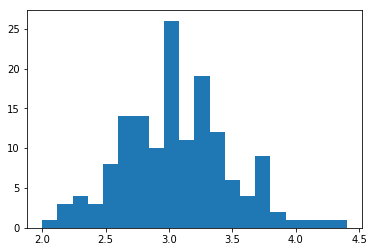

In [164]:
plt.hist(iris["sepal_width"], bins=20)

(array([ 1.,  3.,  4.,  3.,  8., 14., 14., 10., 26., 11., 19., 12.,  6.,
         4.,  9.,  2.,  1.,  1.,  1.,  1.]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

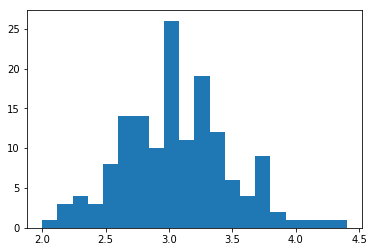

In [187]:
plt.hist(iris["sepal_width"], bins=20, density=False) # density=Falss 실제값, 확률값

(array([0.05555556, 0.16666667, 0.22222222, 0.16666667, 0.44444444,
        0.77777778, 0.77777778, 0.55555556, 1.44444444, 0.61111111,
        1.05555556, 0.66666667, 0.33333333, 0.22222222, 0.5       ,
        0.11111111, 0.05555556, 0.05555556, 0.05555556, 0.05555556]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

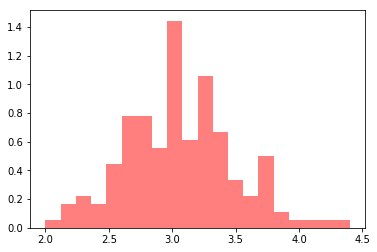

In [167]:
plt.hist(iris["sepal_width"], bins=20, density=True, facecolor="red", alpha=0.5)

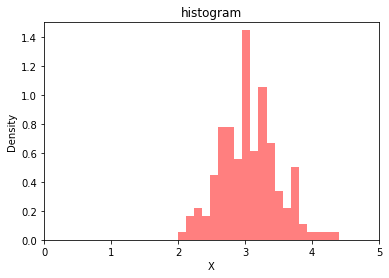

In [177]:
plt.xlabel("X")
plt.ylabel("Density")
plt.title("histogram")
plt.axis([0, 5, 0, 1.5])
plt.hist(iris["sepal_width"], bins=20, density=True, facecolor="red", alpha=0.5)
plt.show()

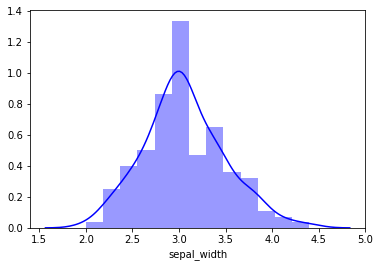

In [184]:
sns.distplot(iris["sepal_width"], color="blue")

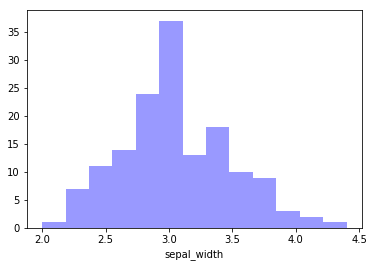

In [183]:
sns.distplot(iris["sepal_width"], color="blue", kde=False)

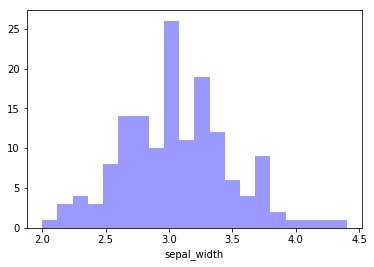

In [185]:
sns.distplot(iris["sepal_width"], color="blue", kde=False, bins=20)